In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-29 21:08:00.135952


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1120.9882)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 32


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.2621)tensor(6.6452)tensor(4.1889)tensor(4.0862)tensor(3.3755)tensor(2.7698)tensor(6.5936)tensor(3.2533)tensor(3.3771)tensor(3.4203)tensor(5.7446)tensor(3.0737)tensor(3.4739)tensor(4.3558)tensor(3.6484)tensor(3.9607)tensor(5.9470)tensor(2.9305)tensor(3.2794)tensor(4.2455)tensor(8.7165)tensor(4.2930)tensor(5.9799)tensor(4.4537)tensor(6.8111)tensor(7.1291)tensor(4.4072)tensor(6.3866)tensor(6.6811)tensor(5.8703)tensor(6.8926)tensor(6.8138)tensor(7.6306)tensor(6.1779)tensor(4.2049)tensor(3.1644)tensor(6.6341)tensor(7.5226)tensor(4.4436)tensor(5.5293)tensor(3.0883)tensor(4.7125)tensor(6.6783)tensor(3.1289)tensor(4.6613)tensor(3.5377)tensor(8.9644)tensor(7.9587)tensor(9.2126)tensor(6.8526)tensor(2.8375)tensor(4.4210)tensor(5.1315)tensor(3.2673)tensor(6.2493)tensor(4.3685)tensor(4.5393)tensor(4.5347)tensor(6.2648)tensor(6.9790)tensor(3.1334)tensor(4.9115)tensor(5.6589)tensor(7.2076)tensor(6.1101)tensor(3.6263)tensor(3.1899)tensor(3.4396)tensor(3.2112)tensor(5.3168)tensor(3.1958)tensor

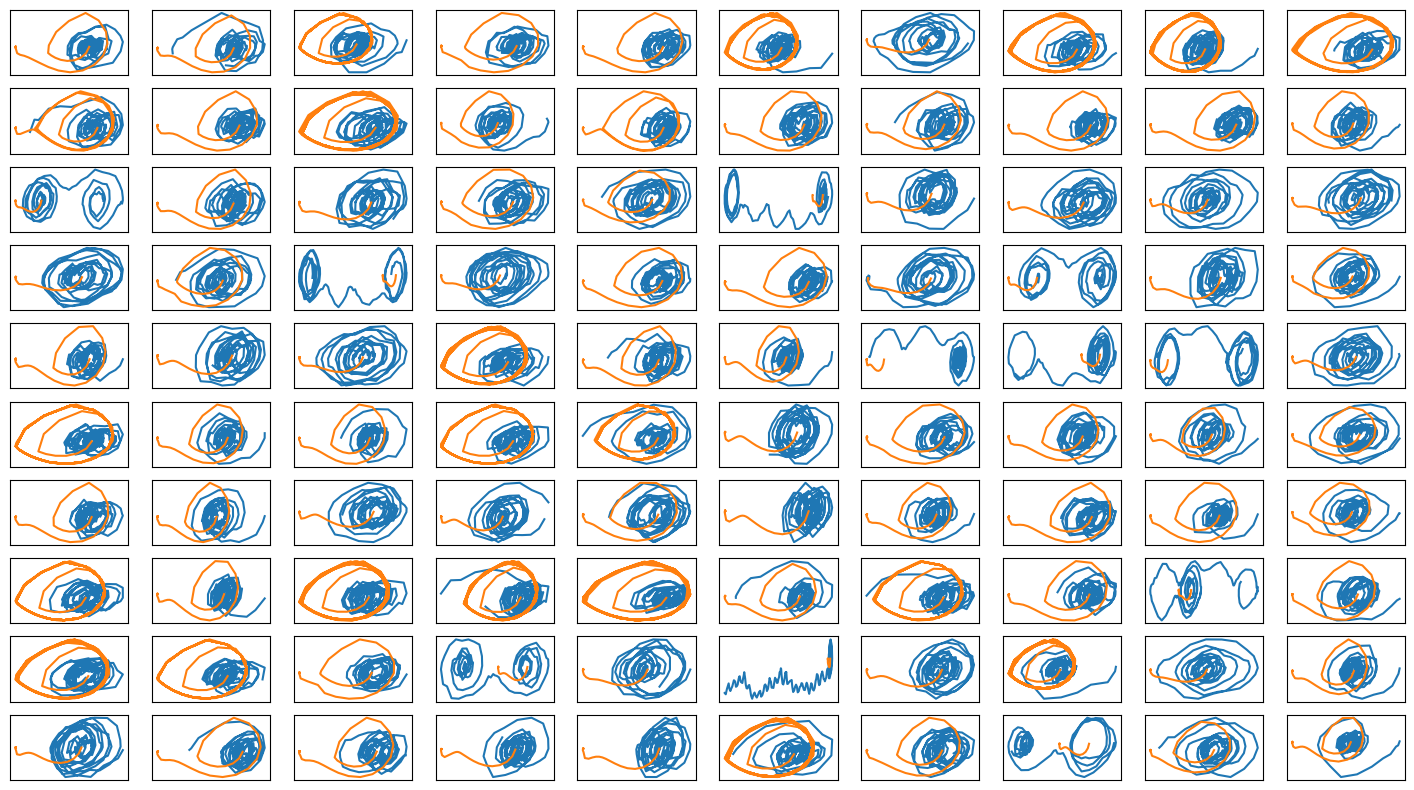

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 816.38752  validloss 557.37820±0.00000  bestvalidloss 557.37820  last_update 0
train: iter 1  trainloss 442.79414  validloss 422.57889±0.00000  bestvalidloss 422.57889  last_update 0
train: iter 2  trainloss 356.75475  validloss 311.50158±0.00000  bestvalidloss 311.50158  last_update 0
train: iter 3  trainloss 318.23298  validloss 293.26160±0.00000  bestvalidloss 293.26160  last_update 0
train: iter 4  trainloss 335.69052  validloss 242.30597±0.00000  bestvalidloss 242.30597  last_update 0
train: iter 5  trainloss 318.07372  validloss 295.93881±0.00000  bestvalidloss 242.30597  last_update 1
train: iter 6  trainloss 268.51214  validloss 241.75268±0.00000  bestvalidloss 241.75268  last_update 0
train: iter 7  trainloss 237.49530  validloss 198.21422±0.00000  bestvalidloss 198.21422  last_update 0
train: iter 8  trainloss 214.69267  validloss 166.78605±0.00000  bestvalidloss 166.78605  last_update 0
train: iter 9  trainloss 194.52184  validloss

train: iter 77  trainloss -534.14442  validloss -630.26973±0.00000  bestvalidloss -723.72540  last_update 1
train: iter 78  trainloss -547.50297  validloss -700.39847±0.00000  bestvalidloss -723.72540  last_update 2
train: iter 79  trainloss -551.91228  validloss -695.23686±0.00000  bestvalidloss -723.72540  last_update 3
train: iter 80  trainloss -547.15924  validloss -705.45581±0.00000  bestvalidloss -723.72540  last_update 4
train: iter 81  trainloss -546.42600  validloss -732.27450±0.00000  bestvalidloss -732.27450  last_update 0
train: iter 82  trainloss -546.27378  validloss -695.68405±0.00000  bestvalidloss -732.27450  last_update 1
train: iter 83  trainloss -543.64856  validloss -722.23168±0.00000  bestvalidloss -732.27450  last_update 2
train: iter 84  trainloss -527.57482  validloss -724.50481±0.00000  bestvalidloss -732.27450  last_update 3
train: iter 85  trainloss -500.52433  validloss -721.66787±0.00000  bestvalidloss -732.27450  last_update 4
train: iter 86  trainloss -5

train: iter 154  trainloss -615.34792  validloss -762.75302±0.00000  bestvalidloss -798.81958  last_update 1
train: iter 155  trainloss -619.91605  validloss -794.66175±0.00000  bestvalidloss -798.81958  last_update 2
train: iter 156  trainloss -620.71880  validloss -775.13829±0.00000  bestvalidloss -798.81958  last_update 3
train: iter 157  trainloss -624.86233  validloss -794.58102±0.00000  bestvalidloss -798.81958  last_update 4
train: iter 158  trainloss -625.57546  validloss -793.17398±0.00000  bestvalidloss -798.81958  last_update 5
train: iter 159  trainloss -586.11107  validloss -792.81366±0.00000  bestvalidloss -798.81958  last_update 6
train: iter 160  trainloss -624.50205  validloss -755.89188±0.00000  bestvalidloss -798.81958  last_update 7
train: iter 161  trainloss -616.18056  validloss -797.85468±0.00000  bestvalidloss -798.81958  last_update 8
train: iter 162  trainloss -611.84902  validloss -783.24827±0.00000  bestvalidloss -798.81958  last_update 9
train: iter 163  tr

train: iter 230  trainloss -637.06238  validloss -806.06729±0.00000  bestvalidloss -823.71193  last_update 58
train: iter 231  trainloss -634.91179  validloss -786.98252±0.00000  bestvalidloss -823.71193  last_update 59
train: iter 232  trainloss -630.55503  validloss -808.47893±0.00000  bestvalidloss -823.71193  last_update 60
train: iter 233  trainloss -642.26674  validloss -797.19470±0.00000  bestvalidloss -823.71193  last_update 61
train: iter 234  trainloss -610.38404  validloss -791.73987±0.00000  bestvalidloss -823.71193  last_update 62
train: iter 235  trainloss -645.85686  validloss -803.43244±0.00000  bestvalidloss -823.71193  last_update 63
train: iter 236  trainloss -627.42834  validloss -771.57412±0.00000  bestvalidloss -823.71193  last_update 64
train: iter 237  trainloss -635.85892  validloss -785.47341±0.00000  bestvalidloss -823.71193  last_update 65
train: iter 238  trainloss -636.87050  validloss -784.86695±0.00000  bestvalidloss -823.71193  last_update 66
train: ite

train: iter 306  trainloss -659.38596  validloss -844.48870±0.00000  bestvalidloss -857.89095  last_update 26
train: iter 307  trainloss -593.66831  validloss -844.36299±0.00000  bestvalidloss -857.89095  last_update 27
train: iter 308  trainloss -551.48505  validloss -411.33247±0.00000  bestvalidloss -857.89095  last_update 28
train: iter 309  trainloss -656.28867  validloss -787.22384±0.00000  bestvalidloss -857.89095  last_update 29
train: iter 310  trainloss -674.36640  validloss -813.09469±0.00000  bestvalidloss -857.89095  last_update 30
train: iter 311  trainloss -646.30816  validloss -859.74574±0.00000  bestvalidloss -859.74574  last_update 0
train: iter 312  trainloss -659.90455  validloss -849.97354±0.00000  bestvalidloss -859.74574  last_update 1
train: iter 313  trainloss -674.92257  validloss -794.32316±0.00000  bestvalidloss -859.74574  last_update 2
train: iter 314  trainloss -667.41411  validloss -859.91559±0.00000  bestvalidloss -859.91559  last_update 0
train: iter 31

train: iter 382  trainloss -671.65367  validloss -827.24654±0.00000  bestvalidloss -881.98984  last_update 13
train: iter 383  trainloss -641.19163  validloss -833.20315±0.00000  bestvalidloss -881.98984  last_update 14
train: iter 384  trainloss -682.86544  validloss -844.02960±0.00000  bestvalidloss -881.98984  last_update 15
train: iter 385  trainloss -680.35832  validloss -859.87044±0.00000  bestvalidloss -881.98984  last_update 16
train: iter 386  trainloss -681.34247  validloss -843.31160±0.00000  bestvalidloss -881.98984  last_update 17
train: iter 387  trainloss -682.65680  validloss -871.31961±0.00000  bestvalidloss -881.98984  last_update 18
train: iter 388  trainloss -691.17230  validloss -872.32052±0.00000  bestvalidloss -881.98984  last_update 19
train: iter 389  trainloss -679.28248  validloss -843.52744±0.00000  bestvalidloss -881.98984  last_update 20
train: iter 390  trainloss -688.64840  validloss -859.43782±0.00000  bestvalidloss -881.98984  last_update 21
train: ite

train: iter 457  trainloss -674.09532  validloss -849.17767±0.00000  bestvalidloss -897.47561  last_update 10
train: iter 458  trainloss -684.46320  validloss -727.67505±0.00000  bestvalidloss -897.47561  last_update 11
train: iter 459  trainloss -696.36898  validloss -884.41507±0.00000  bestvalidloss -897.47561  last_update 12
train: iter 460  trainloss -699.16274  validloss -867.17731±0.00000  bestvalidloss -897.47561  last_update 13
train: iter 461  trainloss -679.55009  validloss -879.45691±0.00000  bestvalidloss -897.47561  last_update 14
train: iter 462  trainloss -683.64330  validloss -878.50631±0.00000  bestvalidloss -897.47561  last_update 15
train: iter 463  trainloss -691.24074  validloss -686.74800±0.00000  bestvalidloss -897.47561  last_update 16
train: iter 464  trainloss -687.81496  validloss -767.89493±0.00000  bestvalidloss -897.47561  last_update 17
train: iter 465  trainloss -671.78325  validloss -877.72223±0.00000  bestvalidloss -897.47561  last_update 18
train: ite

train: iter 532  trainloss -698.50635  validloss -836.04921±0.00000  bestvalidloss -899.96139  last_update 1
train: iter 533  trainloss -698.28951  validloss -878.27008±0.00000  bestvalidloss -899.96139  last_update 2
train: iter 534  trainloss -706.03570  validloss -871.93948±0.00000  bestvalidloss -899.96139  last_update 3
train: iter 535  trainloss -678.90105  validloss -849.99612±0.00000  bestvalidloss -899.96139  last_update 4
train: iter 536  trainloss -688.75258  validloss -855.04084±0.00000  bestvalidloss -899.96139  last_update 5
train: iter 537  trainloss -698.83821  validloss -851.86568±0.00000  bestvalidloss -899.96139  last_update 6
train: iter 538  trainloss -676.12759  validloss -898.01654±0.00000  bestvalidloss -899.96139  last_update 7
train: iter 539  trainloss -712.08157  validloss -861.14883±0.00000  bestvalidloss -899.96139  last_update 8
train: iter 540  trainloss -710.36705  validloss -899.38314±0.00000  bestvalidloss -899.96139  last_update 9
train: iter 541  tr

train: iter 607  trainloss -701.87363  validloss -888.93098±0.00000  bestvalidloss -910.67277  last_update 20
train: iter 608  trainloss -700.33620  validloss -891.80258±0.00000  bestvalidloss -910.67277  last_update 21
train: iter 609  trainloss -712.78329  validloss -874.62985±0.00000  bestvalidloss -910.67277  last_update 22
train: iter 610  trainloss -716.95251  validloss -888.98774±0.00000  bestvalidloss -910.67277  last_update 23
train: iter 611  trainloss -715.67974  validloss -853.27073±0.00000  bestvalidloss -910.67277  last_update 24
train: iter 612  trainloss -703.87844  validloss -896.01618±0.00000  bestvalidloss -910.67277  last_update 25
train: iter 613  trainloss -715.70570  validloss -895.90389±0.00000  bestvalidloss -910.67277  last_update 26
train: iter 614  trainloss -714.49483  validloss -867.08241±0.00000  bestvalidloss -910.67277  last_update 27
train: iter 615  trainloss -716.80367  validloss -881.93010±0.00000  bestvalidloss -910.67277  last_update 28
train: ite

train: iter 682  trainloss -712.96227  validloss -895.40736±0.00000  bestvalidloss -910.67277  last_update 95
train: iter 683  trainloss -710.79385  validloss -866.27778±0.00000  bestvalidloss -910.67277  last_update 96
train: iter 684  trainloss -725.51820  validloss -863.02003±0.00000  bestvalidloss -910.67277  last_update 97
train: iter 685  trainloss -722.32674  validloss -909.10461±0.00000  bestvalidloss -910.67277  last_update 98
train: iter 686  trainloss -720.79820  validloss -866.34962±0.00000  bestvalidloss -910.67277  last_update 99
train: iter 687  trainloss -728.64295  validloss -877.97941±0.00000  bestvalidloss -910.67277  last_update 100
train: fin
penalty_target_min tensor(-5.6088) penalty_target_max tensor(11.4285)


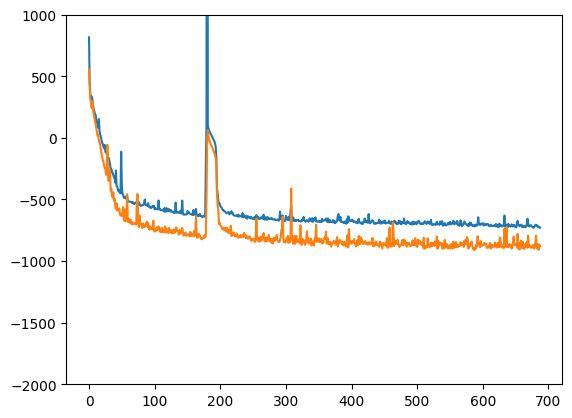

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  predict diverge [ 5.84923177 90.62768327] [ 1.57719704 72.29457252] [248.62628  30.     ] [124.31314  15.     ] sim_timestep 144
21  22  23  24  25  predict diverge [ 0.11623484 89.81323089] [ 1.47987723 75.56134908] [248.62628  30.     ] [124.31314  15.     ] sim_timestep 84
26  27  28  29  30  31  32  predict diverge [  5.56454243 -99.91440001] [   1.41666262 -115.47516341] [248.62628  30.     ] [124.31314  15.     ] sim_timestep 22
33  34  35  36  37  predict diverge [ 4.38683502 75.93200178] [ 1.27733022 62.21670445] [248.62628  30.     ] [124.31314  15.     ] sim_timestep 50
38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  predict diverge [  5.29802668 -34.07576597] [  0.91996953 -46.35516747] [248.62628  30.     ] [124.31314  15.     ] sim_timestep 188
79  80  81  82  83  predict diverge [  6.2

実環境方策rollout vs Sim環境方策rollout


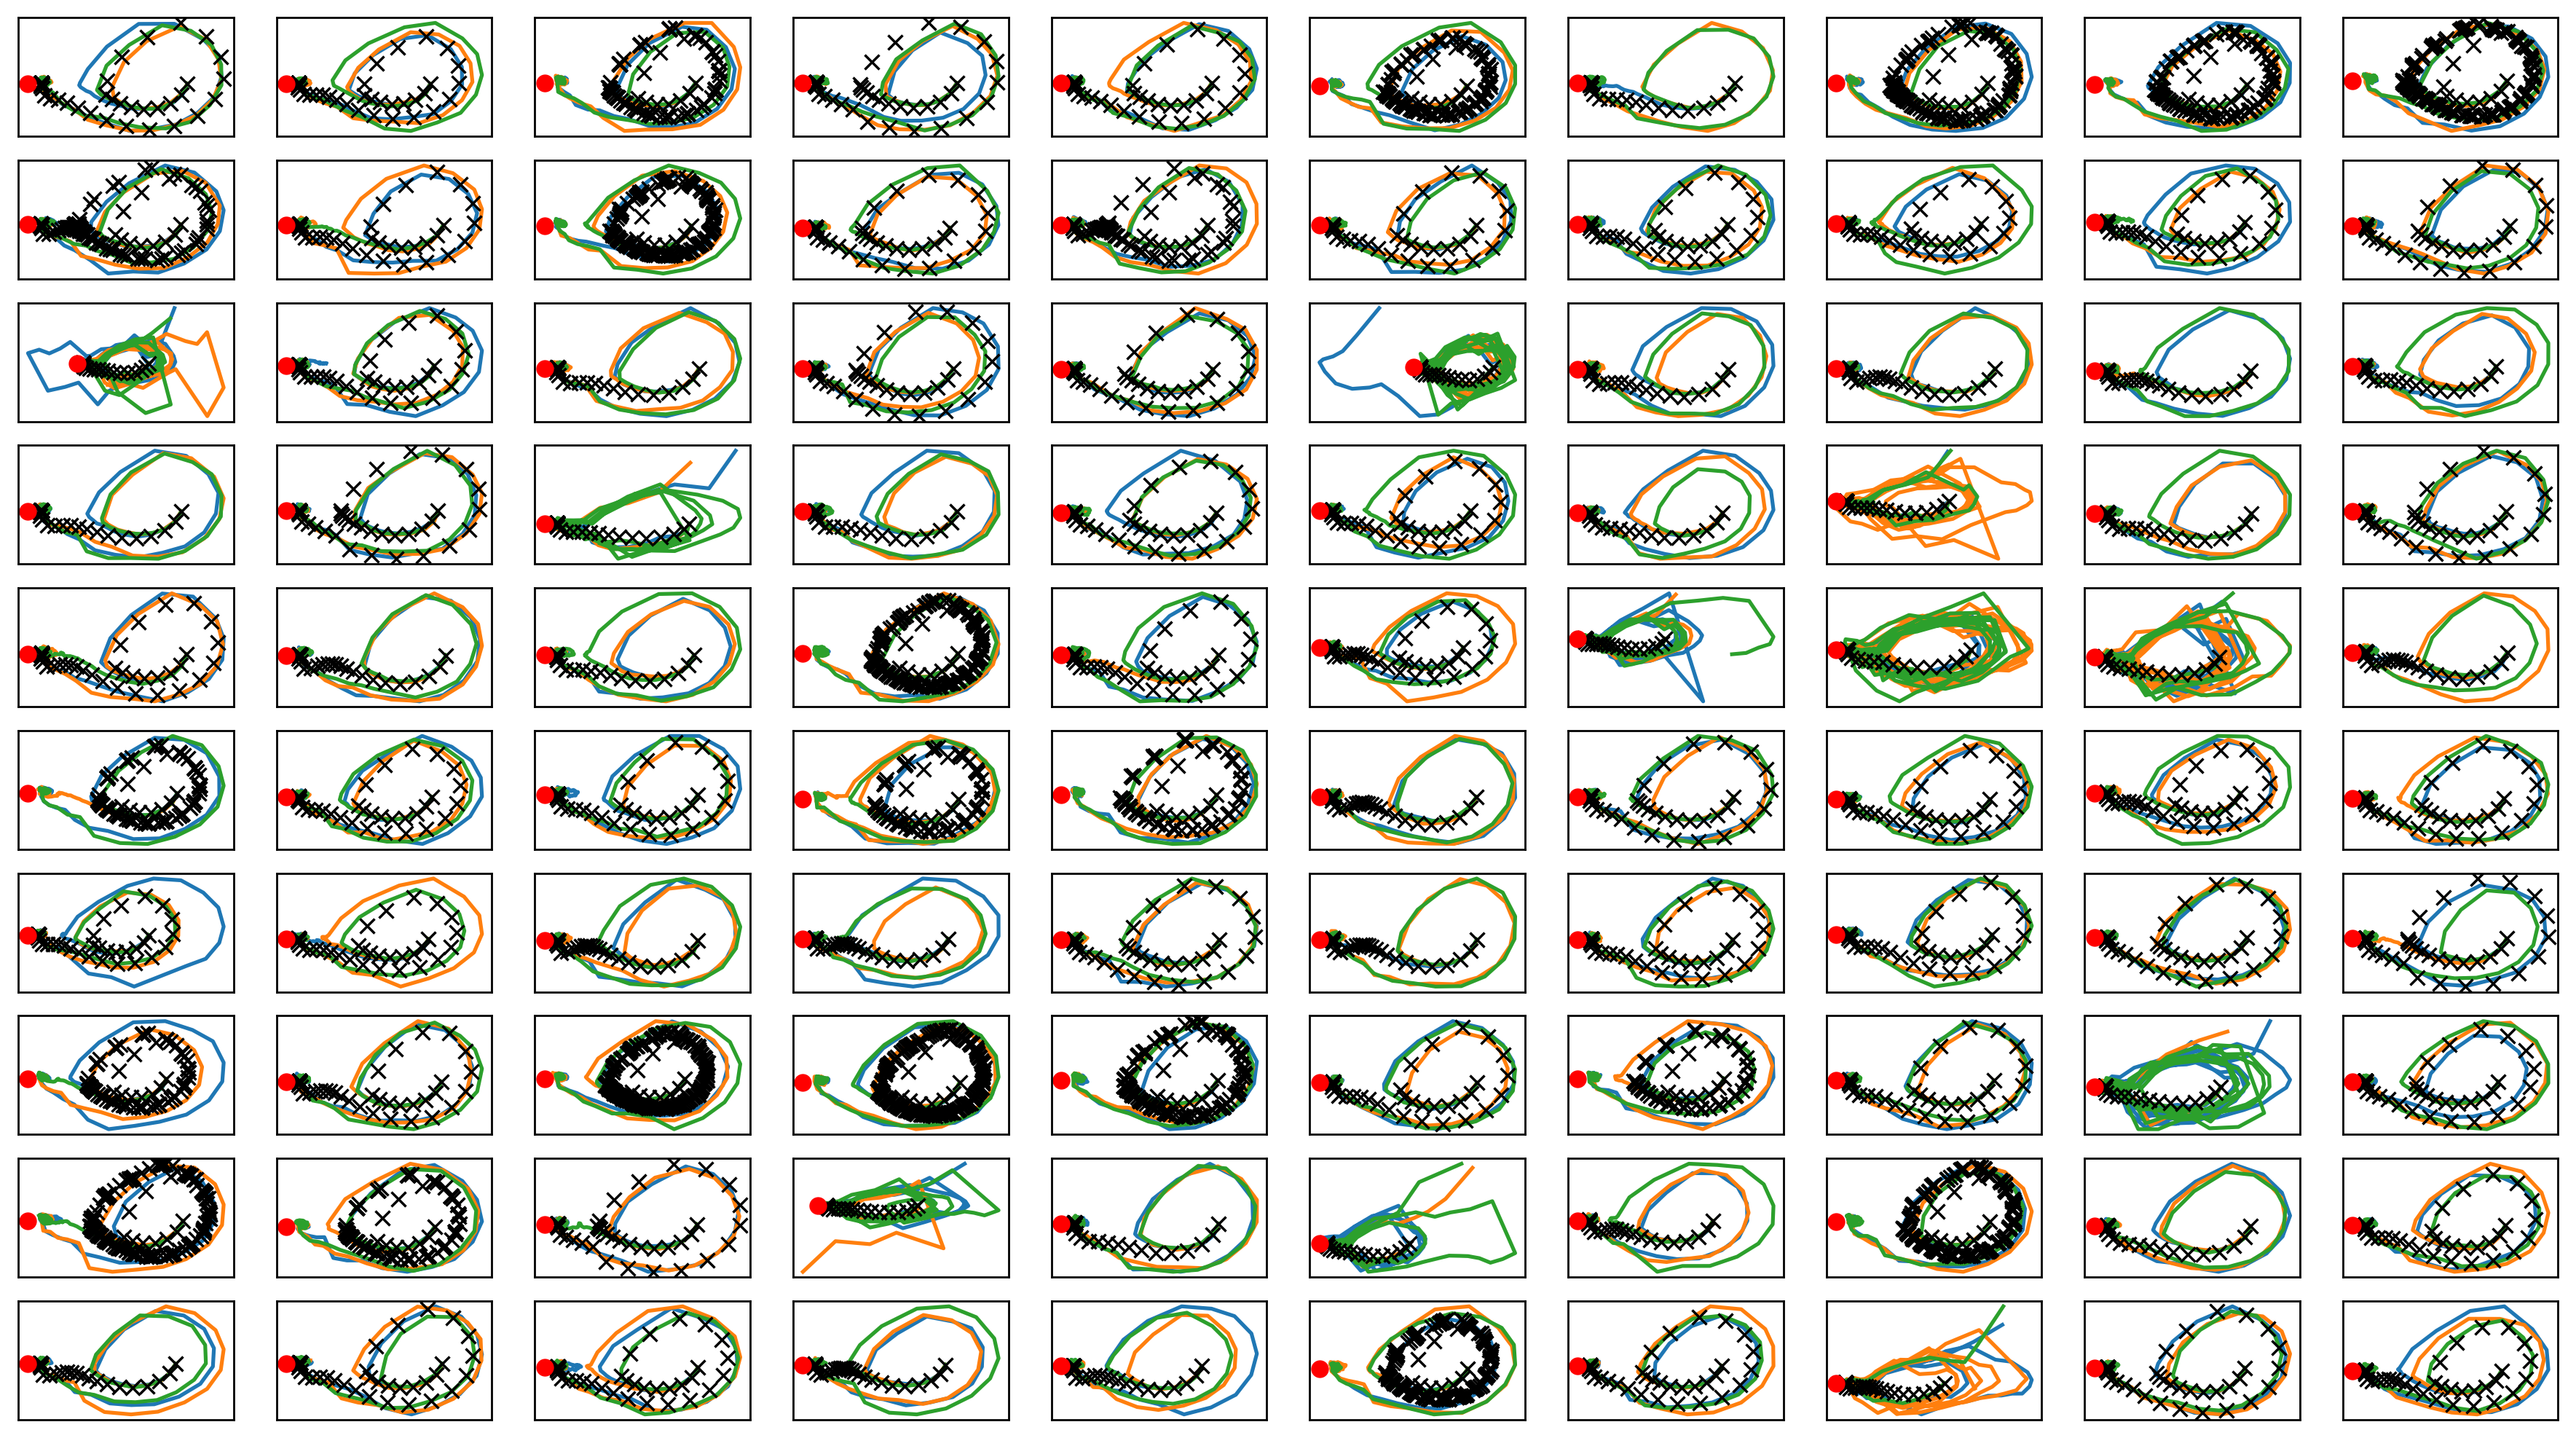

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

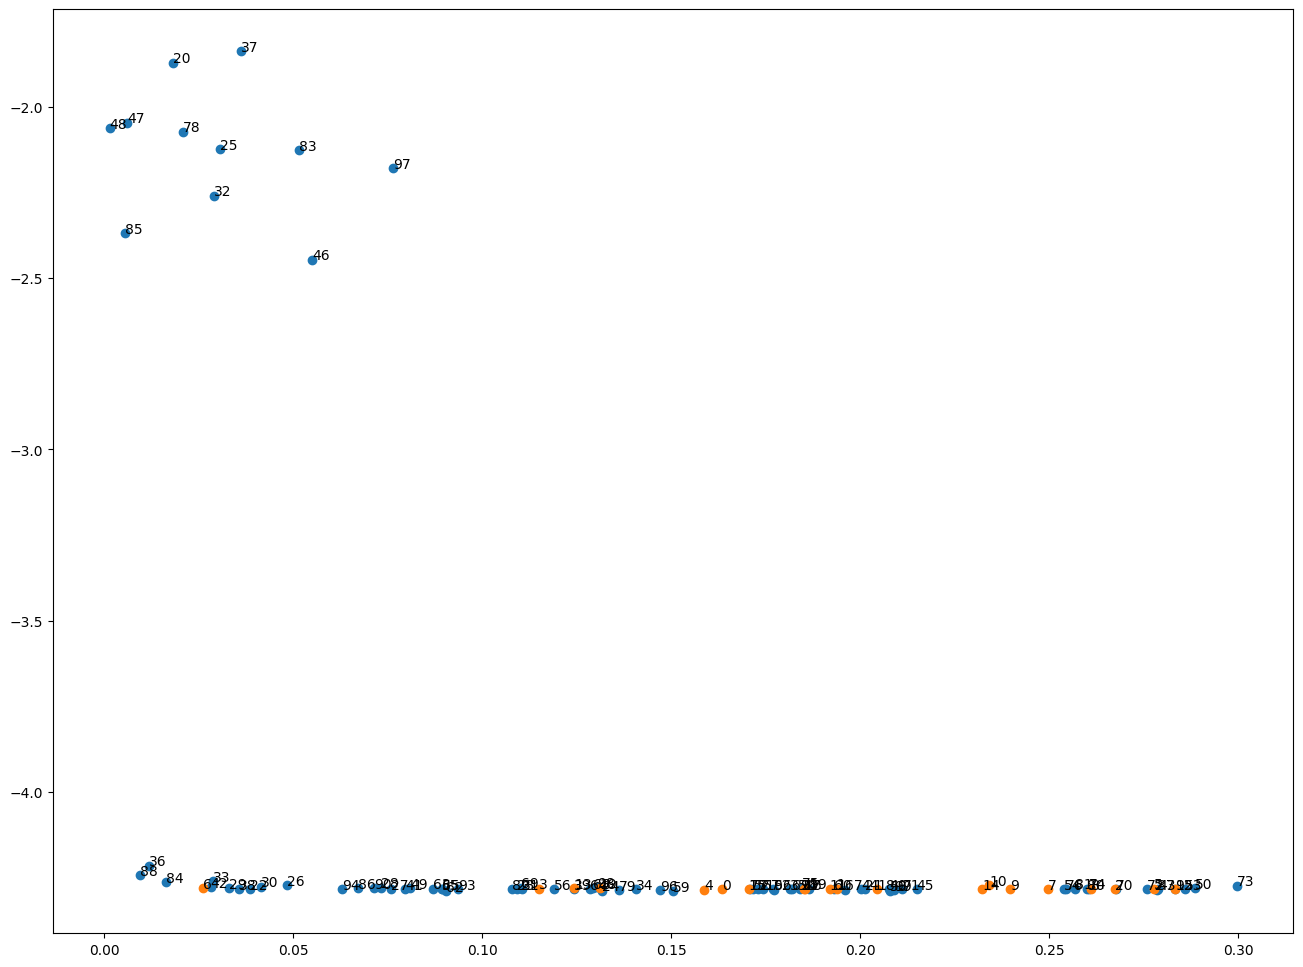

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


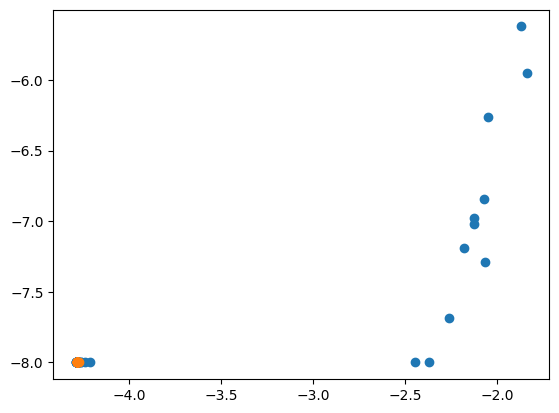

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.69031  validloss 10.07610±0.00000  bestvalidloss 10.07610  last_update 0
train: iter 1  trainloss 7.90995  validloss 9.13015±0.00000  bestvalidloss 9.13015  last_update 0
train: iter 2  trainloss 7.24289  validloss 8.32399±0.00000  bestvalidloss 8.32399  last_update 0
train: iter 3  trainloss 6.68717  validloss 7.66885±0.00000  bestvalidloss 7.66885  last_update 0
train: iter 4  trainloss 6.19251  validloss 7.08312±0.00000  bestvalidloss 7.08312  last_update 0
train: iter 5  trainloss 5.77648  validloss 6.57080±0.00000  bestvalidloss 6.57080  last_update 0
train: iter 6  trainloss 5.39714  validloss 6.12733±0.00000  bestvalidloss 6.12733  last_update 0
train: iter 7  trainloss 5.07688  validloss 5.76116±0.00000  bestvalidloss 5.76116  last_update 0
train: iter 8  trainloss 4.78692  validloss 5.40534±0.00000  bestvalidloss 5.40534  last_update 0
train: iter 9  trainloss 4.54305  validloss 5.10544±0.00000  bestvalidloss 5.10544  last_update 0
train: iter 10  tr

train: iter 85  trainloss 1.20343  validloss 1.01607±0.00000  bestvalidloss 1.01607  last_update 0
train: iter 86  trainloss 1.19660  validloss 0.99404±0.00000  bestvalidloss 0.99404  last_update 0
train: iter 87  trainloss 1.18327  validloss 0.97091±0.00000  bestvalidloss 0.97091  last_update 0
train: iter 88  trainloss 1.17806  validloss 0.95160±0.00000  bestvalidloss 0.95160  last_update 0
train: iter 89  trainloss 1.17495  validloss 0.93308±0.00000  bestvalidloss 0.93308  last_update 0
train: iter 90  trainloss 1.17035  validloss 0.91831±0.00000  bestvalidloss 0.91831  last_update 0
train: iter 91  trainloss 1.15879  validloss 0.89988±0.00000  bestvalidloss 0.89988  last_update 0
train: iter 92  trainloss 1.14782  validloss 0.88737±0.00000  bestvalidloss 0.88737  last_update 0
train: iter 93  trainloss 1.15512  validloss 0.87678±0.00000  bestvalidloss 0.87678  last_update 0
train: iter 94  trainloss 1.15790  validloss 0.86647±0.00000  bestvalidloss 0.86647  last_update 0
train: ite

train: iter 169  trainloss 1.12146  validloss 0.70681±0.00000  bestvalidloss 0.70626  last_update 1
train: iter 170  trainloss 1.12658  validloss 0.70779±0.00000  bestvalidloss 0.70626  last_update 2
train: iter 171  trainloss 1.12305  validloss 0.70791±0.00000  bestvalidloss 0.70626  last_update 3
train: iter 172  trainloss 1.12905  validloss 0.71383±0.00000  bestvalidloss 0.70626  last_update 4
train: iter 173  trainloss 1.11351  validloss 0.70988±0.00000  bestvalidloss 0.70626  last_update 5
train: iter 174  trainloss 1.11970  validloss 0.70997±0.00000  bestvalidloss 0.70626  last_update 6
train: iter 175  trainloss 1.12219  validloss 0.70913±0.00000  bestvalidloss 0.70626  last_update 7
train: iter 176  trainloss 1.13236  validloss 0.71160±0.00000  bestvalidloss 0.70626  last_update 8
train: iter 177  trainloss 1.12316  validloss 0.71024±0.00000  bestvalidloss 0.70626  last_update 9
train: iter 178  trainloss 1.13084  validloss 0.71067±0.00000  bestvalidloss 0.70626  last_update 10

train: iter 254  trainloss 1.11527  validloss 0.70608±0.00000  bestvalidloss 0.69746  last_update 24
train: iter 255  trainloss 1.12489  validloss 0.70379±0.00000  bestvalidloss 0.69746  last_update 25
train: iter 256  trainloss 1.11598  validloss 0.70206±0.00000  bestvalidloss 0.69746  last_update 26
train: iter 257  trainloss 1.12242  validloss 0.70146±0.00000  bestvalidloss 0.69746  last_update 27
train: iter 258  trainloss 1.12383  validloss 0.70547±0.00000  bestvalidloss 0.69746  last_update 28
train: iter 259  trainloss 1.12505  validloss 0.70542±0.00000  bestvalidloss 0.69746  last_update 29
train: iter 260  trainloss 1.11918  validloss 0.70105±0.00000  bestvalidloss 0.69746  last_update 30
train: iter 261  trainloss 1.12968  validloss 0.70443±0.00000  bestvalidloss 0.69746  last_update 31
train: iter 262  trainloss 1.12611  validloss 0.69828±0.00000  bestvalidloss 0.69746  last_update 32
train: iter 263  trainloss 1.12399  validloss 0.70567±0.00000  bestvalidloss 0.69746  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-3.9884, -0.5920], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 15.11581  validloss 24.11999±0.00000  bestvalidloss 24.11999  last_update 0
train: iter 1  trainloss 8.72204  validloss 14.24801±0.00000  bestvalidloss 14.24801  last_update 0
train: iter 2  trainloss 5.39032  validloss 7.24397±0.00000  bestvalidloss 7.24397  last_update 0
train: iter 3  trainloss 4.09556  validloss 4.13818±0.00000  bestvalidloss 4.13818  last_update 0
train: iter 4  trainloss 3.59363  validloss 2.92685±0.00000  bestvalidloss 2.92685  last_update 0
train: iter 5  trainloss 3.32441  validloss 2.27261±0.00000  bestvalidloss 2.27261  last_update 0
train: iter 6  trainloss 3.04854  validloss 2.01592±0.00000  bestvalidloss 2.01592  last_update 0
train: iter 7  trainloss 2.82386  validloss 1.80588±0.00000  bestvalidloss 1.80588  last_update 0
train: iter 8  trainloss 2.59341  validloss 1.65112±0.00000  bestvalidloss 1.65112  last_update 0
train: iter 9  trainloss 2.39589  validloss 1.49855±0.00000  bestvalidloss 1.49855  last_update 0
train: iter 10 

train: iter 84  trainloss 1.53480  validloss 1.07575±0.00000  bestvalidloss 1.03418  last_update 50
train: iter 85  trainloss 1.55205  validloss 1.07638±0.00000  bestvalidloss 1.03418  last_update 51
train: iter 86  trainloss 1.53223  validloss 1.22704±0.00000  bestvalidloss 1.03418  last_update 52
train: iter 87  trainloss 1.54353  validloss 1.07332±0.00000  bestvalidloss 1.03418  last_update 53
train: iter 88  trainloss 1.56768  validloss 1.05248±0.00000  bestvalidloss 1.03418  last_update 54
train: iter 89  trainloss 1.54325  validloss 1.05481±0.00000  bestvalidloss 1.03418  last_update 55
train: iter 90  trainloss 1.56190  validloss 1.11768±0.00000  bestvalidloss 1.03418  last_update 56
train: iter 91  trainloss 1.56125  validloss 1.10368±0.00000  bestvalidloss 1.03418  last_update 57
train: iter 92  trainloss 1.55581  validloss 1.11670±0.00000  bestvalidloss 1.03418  last_update 58
train: iter 93  trainloss 1.54054  validloss 1.08901±0.00000  bestvalidloss 1.03418  last_update 59


train: iter 167  trainloss 1.54781  validloss 1.07773±0.00000  bestvalidloss 1.02640  last_update 56
train: iter 168  trainloss 1.55291  validloss 1.25262±0.00000  bestvalidloss 1.02640  last_update 57
train: iter 169  trainloss 1.56152  validloss 1.11022±0.00000  bestvalidloss 1.02640  last_update 58
train: iter 170  trainloss 1.54609  validloss 1.09810±0.00000  bestvalidloss 1.02640  last_update 59
train: iter 171  trainloss 1.52836  validloss 1.01056±0.00000  bestvalidloss 1.01056  last_update 0
train: iter 172  trainloss 1.56130  validloss 1.12948±0.00000  bestvalidloss 1.01056  last_update 1
train: iter 173  trainloss 1.56275  validloss 1.08579±0.00000  bestvalidloss 1.01056  last_update 2
train: iter 174  trainloss 1.54780  validloss 1.11312±0.00000  bestvalidloss 1.01056  last_update 3
train: iter 175  trainloss 1.56869  validloss 1.16108±0.00000  bestvalidloss 1.01056  last_update 4
train: iter 176  trainloss 1.53625  validloss 1.14516±0.00000  bestvalidloss 1.01056  last_updat

train: iter 250  trainloss 1.56338  validloss 1.12783±0.00000  bestvalidloss 1.01056  last_update 79
train: iter 251  trainloss 1.53713  validloss 1.07738±0.00000  bestvalidloss 1.01056  last_update 80
train: iter 252  trainloss 1.53635  validloss 1.14120±0.00000  bestvalidloss 1.01056  last_update 81
train: iter 253  trainloss 1.52799  validloss 1.04983±0.00000  bestvalidloss 1.01056  last_update 82
train: iter 254  trainloss 1.54735  validloss 1.08895±0.00000  bestvalidloss 1.01056  last_update 83
train: iter 255  trainloss 1.55340  validloss 1.11503±0.00000  bestvalidloss 1.01056  last_update 84
train: iter 256  trainloss 1.54337  validloss 1.05237±0.00000  bestvalidloss 1.01056  last_update 85
train: iter 257  trainloss 1.54109  validloss 1.14513±0.00000  bestvalidloss 1.01056  last_update 86
train: iter 258  trainloss 1.56542  validloss 1.07682±0.00000  bestvalidloss 1.01056  last_update 87
train: iter 259  trainloss 1.54891  validloss 1.12254±0.00000  bestvalidloss 1.01056  last_

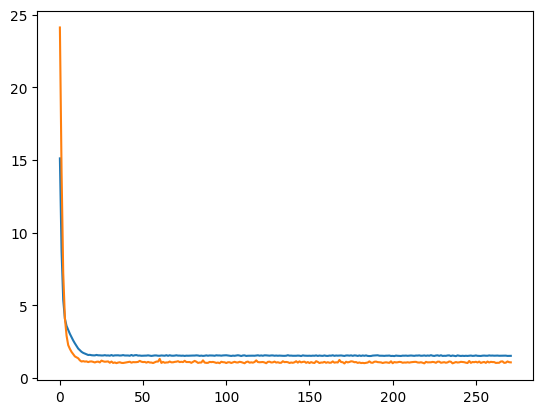

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-4.5803)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(1.3821)


In [21]:
print(vi.h_min_tilde)

-5.6088276


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.09105433954388077
tensor([-0.2473])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

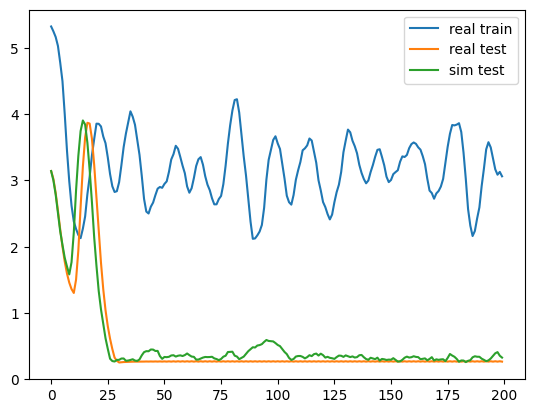

encoder [-4.279918 -8.      ]
initial_belief tensor([-3.9884, -0.5920])
real train tensor([-4.2927, -8.0049])
real test tensor([-2.0630, -7.2880])
sim tensor([-4.2611, -7.9883])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.26530612244898


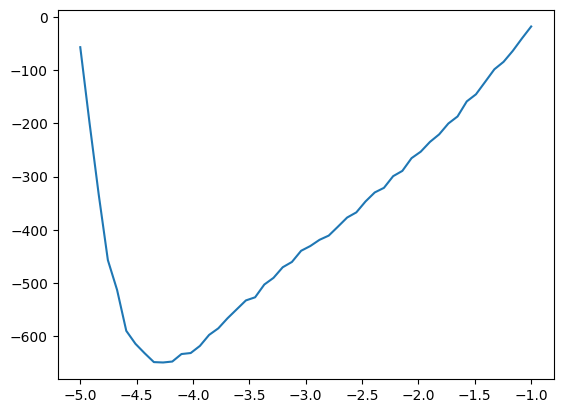

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.952474198412415
tensor([-0.7614])
